# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.031064e+01     6.567599e+00
 * time: 0.00465083122253418
     1     2.830476e+01     4.971151e+00
 * time: 0.013772964477539062
     2     2.306329e+01     7.274339e+00
 * time: 0.03555583953857422
     3     1.366810e+01     1.998009e+00
 * time: 0.06169390678405762
     4     1.252518e+01     2.304043e+00
 * time: 0.07934284210205078
     5     1.179026e+01     1.547049e+00
 * time: 0.09686779975891113
     6     1.038479e+01     1.743857e+00
 * time: 0.11452794075012207
     7     9.914301e+00     8.771333e-01
 * time: 0.13206696510314941
     8     9.672960e+00     9.722307e-01
 * time: 0.1495678424835205
     9     9.446419e+00     5.682632e-01
 * time: 0.1670668125152588
    10     9.291245e+00     4.602066e-01
 * time: 0.18459200859069824
    11     9.291065e+00     1.315921e+00
 * time: 0.19785594940185547
    12     9.256544e+00     7.648755e-01
 * time: 0.2109689712524414
    13     9.197894e+00     6.661601e-01
 * time: 0

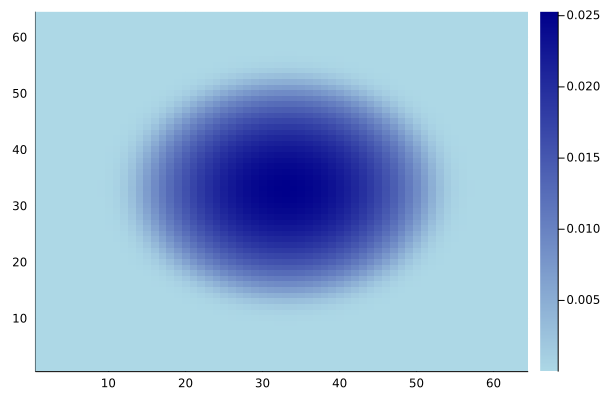

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)